In [1]:
import numpy as np
import matplotlib.pyplot as plt

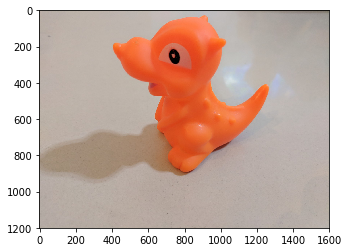

In [2]:
im = plt.imread("img/dino1.jpg")
plt.imshow(im)

In [23]:
class Homog:
    def cart2homog(self,xk):
        ones = np.ones(xk.shape[1])
        return np.vstack((xk,ones))

In [25]:
class Plotter:
    def __init__(self,im_shape=(0,0),**params):
        self.H,self.W = im_shape
        self.s = .5
        self.c = "r"
        if isinstance(params,dict):
            self.set_par(params)
            
    def set_par(self,params):
        for k,v in params.items():
            self.__dict__[k] = v
            
    def line(self,l,**params):
        if isinstance(params,dict):
            self.set_par(params)
            
        a,b,c = l
        if b==0:
            xrange = (-c/a)*np.ones(self.H)
            y = np.linspace(0,self.H,self.H)
        else:
            n = -a/b
            d = -c/b
            f = lambda x:n*x+d
            xrange = np.arange(self.W)
            y = self.H-f(xrange)

        plt.plot(xrange,y,c=self.c)
        pass
    
    def lines(self,l,**params):
        if isinstance(params,dict):
            self.set_par(params)
        for i in range(l.shape[1]):
            self.line(l[:,i])
    
    def points(self,p,**params):
        if isinstance(params,dict):
            self.set_par(params)
        
        for i in range(p.shape[1]):
            self.point(p[:,i])

    def point(self,p,**params):
        if isinstance(params,dict):
            self.set_par(params)
            
        if p[2]==0:
            print("point at infinity")
        else:
            xk = p[:2]/p[2]
        plt.scatter(xk[0],self.H-xk[1],c=self.c,s=self.s)
        pass

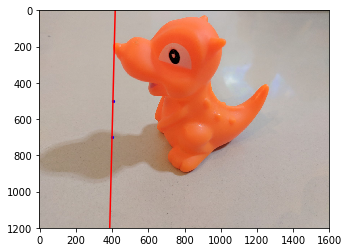

In [17]:
p1 = np.array([400,500,1])
p2 = np.array([405,700,1])

l = np.cross(p1,p2)

H,W,C = im.shape
plotter = Plotter((H,W))

par = {'c':'r','s':.5}
plotter.line(l,**par)

par = {'c':'b','s':5}
plotter.point(p1,**par)
plotter.point(p2,**par)
plt.imshow(im)


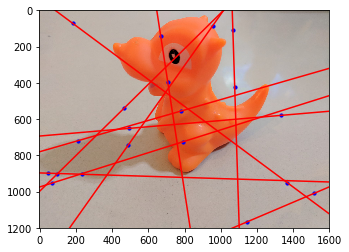

In [38]:
H,W,C = im.shape
plotter = Plotter((H,W))
ls = []
p1s = []
p2s = []
for i in range(10):
    j = np.random.randint(H)
    i = np.random.randint(W)

    jj = np.random.randint(H)
    ii = np.random.randint(W)

    p1 = np.array([i,j,1])
    p2 = np.array([ii,jj,1])

    l = np.cross(p1,p2)
    ls.append(l)
    p1s.append(p1)
    p2s.append(p2)

    
ls = np.array(ls).T
p1s = np.array(p1s).T
p2s = np.array(p2s).T

plotter.lines(ls)
par = {'c':'b','s':10}
plotter.points(p1s,**par)
plotter.points(p2s,**par)
plt.imshow(im)

In [36]:
p1s.shape,ls.shape

((3, 10), (3, 10))

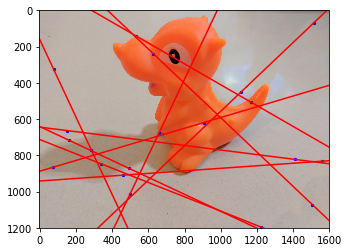

In [18]:
H,W,C = im.shape
plotter = Plotter((H,W))

for i in range(10):
    j = np.random.randint(H)
    i = np.random.randint(W)

    jj = np.random.randint(H)
    ii = np.random.randint(W)

    p1 = np.array([i,j,1])
    p2 = np.array([ii,jj,1])

    l = np.cross(p1,p2)

    par = {'c':'r','s':.5}
    plotter.line(l,**par)

    par = {'c':'b','s':5}
    plotter.point(p1,**par)
    plotter.point(p2,**par)
    plt.imshow(im)